In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [276]:
data = pd.read_csv('mymoviedb.csv')
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


## **Initial Data Processing**

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [278]:
data[data.isnull().any(axis=1)]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1105,20-10-2013,Pixie Hollow Bake Off,Tink challenges Gelata to see who can bake the...,NaN,NaN,NaN,NaN,NaN,NaN
1106,- Just Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,- If The Hue Fits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,- Dust Up,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,- Scents And Sensibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,- Just One Of The Girls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,- Volleybug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1112,- Hide And Tink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1113,- Rainbow's Ends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1114,- Fawn And Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:
evil_rows = data.iloc[1106:1115, :]
evil_rows['Title'] = evil_rows['Release_Date']
evil_rows['Title'] = evil_rows['Title'].apply(lambda x: x.split('- ')[1])
evil_rows['Release_Date'] = np.nan
evil_rows

C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_13356\3283828361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evil_rows['Title'] = evil_rows['Release_Date']
C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_13356\3283828361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evil_rows['Title'] = evil_rows['Title'].apply(lambda x: x.split('- ')[1])
C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_13356\3283828361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1106,NaN,Just Desserts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,NaN,If The Hue Fits,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,NaN,Dust Up,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1109,NaN,Scents And Sensibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1110,NaN,Just One Of The Girls,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1111,NaN,Volleybug,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1112,NaN,Hide And Tink,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1113,NaN,Rainbow's Ends,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1114,NaN,Fawn And Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
mal_row = data.iloc[1115:1116, :]
mal_row['Poster_Url'] = mal_row['Original_Language']
mal_row['Genre'] = mal_row['Vote_Average']
mal_row['Original_Language'] = mal_row['Vote_Count']
mal_row['Vote_Count'] = mal_row['Overview']
mal_row['Vote_Average'] = mal_row['Popularity']
mal_row['Popularity'] = mal_row['Title']
mal_row['Popularity'] = mal_row['Popularity'].apply(lambda x: float(x))
mal_row['Title'] = mal_row['Release_Date'].apply(lambda x: x.split('- ')[1])
mal_row['Release_Date'] = np.nan
mal_row['Overview'] = np.nan
mal_row

C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_13356\290397140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mal_row['Poster_Url'] = mal_row['Original_Language']
C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_13356\290397140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mal_row['Genre'] = mal_row['Vote_Average']
C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_13356\290397140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1115,NaN,Magic Tricks,NaN,61.328,35,7.1,en,Animation,https://image.tmdb.org/t/p/original/6iXYe7AkQ1...


In [281]:
data = data.drop([i for i in range(1106, 1116)])
data = pd.concat([data, evil_rows, mal_row], ignore_index=True)
data

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,NaN,Volleybug,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,NaN,Hide And Tink,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,NaN,Rainbow's Ends,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9835,NaN,Fawn And Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Genre Related Analysis**
---

In [282]:
# removing rows having missing genres
data_with_available_genres = data[data['Genre'].notnull()]
data_with_available_genres['Genre'].isnull().sum()

total_movies = data_with_available_genres.shape[0]
total_movies

9827

In [283]:
# extracting individual genres
genres = data_with_available_genres['Genre'].unique()
indv_genres = set()

for g in genres:
    gs = g.split(', ')
    for el in gs:
        indv_genres.add(el)

av_genres = list(indv_genres)
av_genres

['Science Fiction',
 'Western',
 'Comedy',
 'Drama',
 'History',
 'Music',
 'Family',
 'Animation',
 'Mystery',
 'Fantasy',
 'Documentary',
 'Romance',
 'Horror',
 'Crime',
 'TV Movie',
 'Adventure',
 'War',
 'Action',
 'Thriller']

## **1. What is the most frequent genre on Netflix?**

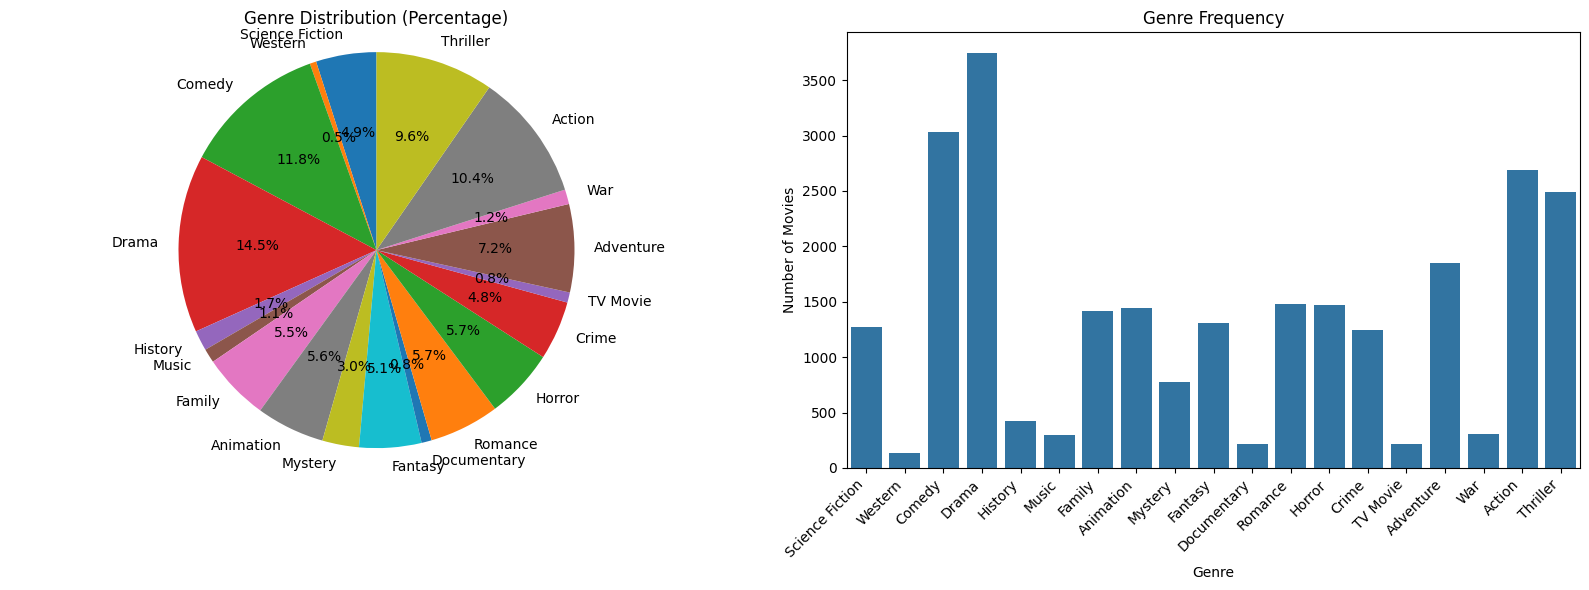

Most frequent genre is: Drama


In [284]:
# counting counts of each available genres
genres_dict = {g: 0 for g in av_genres}

for index, row in data_with_available_genres.iterrows():
    genres = row.Genre.split(', ')
    for g in genres:
        genres_dict[g] += 1


# visualistion
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.pie(
    genres_dict.values(),
    labels=genres_dict.keys(),
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Genre Distribution (Percentage)")
plt.axis('equal') 

plt.subplot(1, 2, 2)
sns.barplot(
    x=list(genres_dict.keys()),
    y=list(genres_dict.values())
)

plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Genre Frequency")

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

freq_genre = max(genres_dict, key= genres_dict.get)
print(f"Most frequent genre is: {freq_genre}")

## **2. Which genre has highest votes?**

In [285]:
data_with_available_genres.Vote_Count.isnull().sum()

np.int64(0)

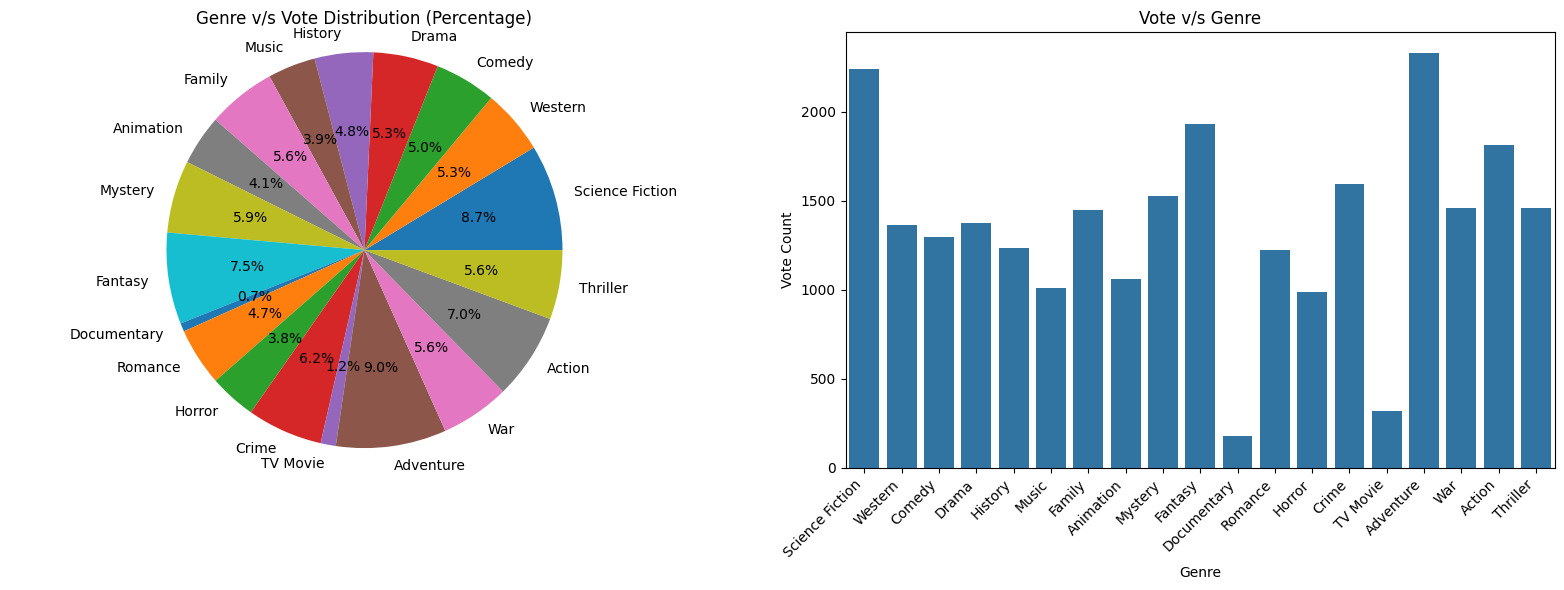

Most voted genre is: Adventure
{'Science Fiction': 2239.1798900235663, 'Western': 1363.941605839416, 'Comedy': 1297.7555262289673, 'Drama': 1373.2625534188035, 'History': 1234.3231850117097, 'Music': 1008.2915254237288, 'Family': 1447.40099009901, 'Animation': 1059.794996525365, 'Mystery': 1528.1694695989652, 'Fantasy': 1928.0886850152906, 'Documentary': 177.78604651162792, 'Romance': 1222.0569105691056, 'Horror': 985.3646258503402, 'Crime': 1594.4130434782608, 'TV Movie': 319.81775700934577, 'Adventure': 2328.045871559633, 'War': 1457.525974025974, 'Action': 1812.6116902457186, 'Thriller': 1459.6438906752412}


In [286]:
# counting votes of each available genres
vote_dict = {g: 0 for g in av_genres}

for index, row in data_with_available_genres.iterrows():
    genres = row.Genre.split(', ')
    vote = float(row.Vote_Count)
    for g in genres:
        vote_dict[g] += vote


# normalise the vote count
vote_dict = {g: (v / genres_dict[g]) for g, v in vote_dict.items()}

# visualistion
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.pie(
    vote_dict.values(),
    labels=vote_dict.keys(),
    autopct='%1.1f%%',
    # startangle=90
)
plt.title("Genre v/s Vote Distribution (Percentage)")
plt.axis('equal') 

plt.subplot(1, 2, 2)
sns.barplot(
    x=list(vote_dict.keys()),
    y=list(vote_dict.values())
)

plt.xlabel("Genre")
plt.ylabel("Vote Count")
plt.title("Vote v/s Genre")

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

most_voted_genre = max(vote_dict, key= vote_dict.get)
print(f"Most voted genre is: {most_voted_genre}")

print(vote_dict)

## **3. Which movie got highest popularity? State the genre also.**

In [287]:
data['Popularity'].describe() 

count    9827.000000
mean       40.326088
std       108.873998
min        13.354000
25%        16.128500
50%        21.199000
75%        35.191500
max      5083.954000
Name: Popularity, dtype: float64

In [288]:
data["Popularity"]

0       5083.954
1       3827.658
2       2618.087
3       2402.201
4       1895.511
          ...   
9832         NaN
9833         NaN
9834         NaN
9835         NaN
9836      61.328
Name: Popularity, Length: 9837, dtype: float64

In [289]:
movie_with_highest_popularity = data[data['Popularity'] == data['Popularity'].max()]['Title'].values[0]
movie_genres = data[data['Popularity'] == data['Popularity'].max()]['Genre'].values[0]
print(f"Movie: {movie_with_highest_popularity} is the most popular one. Genre includes {movie_genres}.")

Movie: Spider-Man: No Way Home is the most popular one. Genre includes Action, Adventure, Science Fiction.


In [290]:
movie_with_lowest_popularity = data[data['Popularity'] == data['Popularity'].min()]['Title'].values
movie_genres = data[data['Popularity'] == data['Popularity'].min()]['Genre'].values
print(f"Movie: {movie_with_lowest_popularity} is the most unpopular one. Genre includes {movie_genres}.")

Movie: ['The United States vs. Billie Holiday' 'Threads'] is the most unpopular one. Genre includes ['Music, Drama, History' 'War, Drama, Science Fiction'].


## **4. Which year has the most filmed movies?**

C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_13356\1794210673.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Release_Date'] = pd.to_datetime(data['Release_Date'])


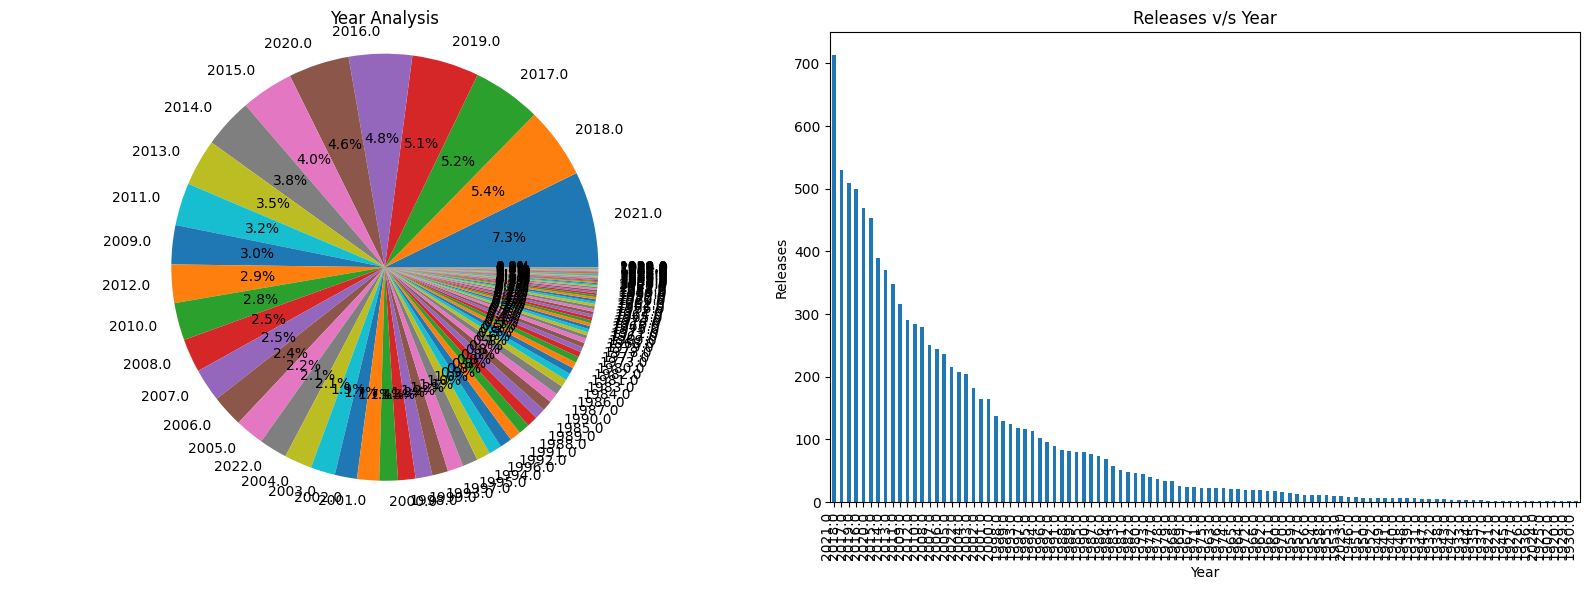

Year 2021.0 has the highest releases with 714 movies


In [291]:
# extracting year
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
data['Year'] = data['Release_Date'].dt.year
years_count = data['Year'].value_counts()

# visulalisation
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.pie(
    years_count.values,
    labels=years_count.index,
    autopct='%1.1f%%',
    # startangle=90
)
plt.title("Year Analysis")
plt.axis('equal') 

plt.subplot(1, 2, 2)
years_count.plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Releases")
plt.title("Releases v/s Year")

plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

print(f"Year {years_count.index[0]} has the highest releases with {years_count.values[0]} movies")

<Axes: >

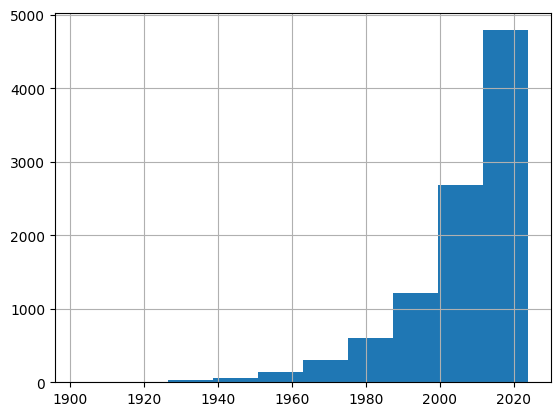

In [292]:
data['Year'].hist()

## **Another way to handle Genre**

In [293]:
# extracting genres to list
data = data.dropna()
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre').reset_index(drop=True)
data

C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_13356\746573261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Genre'] = data['Genre'].str.split(', ')


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021.0
1,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021.0
2,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021.0
3,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022.0
4,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022.0
...,...,...,...,...,...,...,...,...,...,...
25787,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,Drama,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,2021.0
25788,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,History,https://image.tmdb.org/t/p/original/vEzkxuE2sJ...,2021.0
25789,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,War,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...,1984.0
25790,1984-09-23,Threads,Documentary style account of a nuclear holocau...,13.354,186,7.8,en,Drama,https://image.tmdb.org/t/p/original/lBhU4U9Eeh...,1984.0
